<a href="https://colab.research.google.com/github/ashik-sj/Internship-Project/blob/main/Team_Mavericks_Varcon's_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
X_train = ["This was really awesome an awesome movie",
           "Great movie! Ilikes it a lot",
           "Happy Ending! Awesome Acting by hero",
           "loved it!",
           "Bad not upto the mark",
           "Could have been better",
           "really Dissapointed by the movie"]


y_train = ["positive","positive","positive","positive","negative","negative","negative"] # 1- Positive class, 0- negative class



In [ ]:
X_train # Reviews

['This was really awesome an awesome movie',
 'Great movie! Ilikes it a lot',
 'Happy Ending! Awesome Acting by hero',
 'loved it!',
 'Bad not upto the mark',
 'Could have been better',
 'really Dissapointed by the movie']

# Cleaning of the data

In [ ]:
# Tokenize
# "I am a python dev" -> ["I", "am", "a", "python", "dev"]

In [ ]:
from nltk.tokenize import RegexpTokenizer
# NLTK -> Tokenize -> RegexpTokenizer

In [ ]:
# Stemming
# "Playing" -> "Play"
# "Working" -> "Work"

In [ ]:
from nltk.stem.porter import PorterStemmer
# NLTK -> Stem -> Porter -> PorterStemmer

from nltk.corpus import stopwords
# NLTK -> Corpus -> stopwords

In [ ]:
# Downloading the stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

In [ ]:
def getCleanedText(text):
  text = text.lower()

  # tokenizing
  tokens = tokenizer.tokenize(text)
  new_tokens = [token for token in tokens if token not in en_stopwords]
  stemmed_tokens = [ps.stem(tokens) for tokens in new_tokens]
  clean_text = " ".join(stemmed_tokens)
  return clean_text

# Input from the user

In [ ]:
X_test = ["It was good"]

In [ ]:
X_clean = [getCleanedText(i) for i in X_train]
xt_clean = [getCleanedText(i) for i in X_test]

In [ ]:
X_clean

['realli awesom awesom movi',
 'great movi ilik lot',
 'happi end awesom act hero',
 'love',
 'bad upto mark',
 'could better',
 'realli dissapoint movi']

In [ ]:
xt_clean

['good']

In [ ]:
# Data before cleaning
'''
X_train = ["This was awesome an awesome movie",
           "Great movie! Ilikes it a lot",
           "Happy Ending! Awesome Acting by hero",
           "loved it!",
           "Bad not upto the mark",
           "Could have been better",
           "Dissapointed by the movie"]
'''

'\nX_train = ["This was awesome an awesome movie",\n           "Great movie! Ilikes it a lot",\n           "Happy Ending! Awesome Acting by hero",\n           "loved it!",\n           "Bad not upto the mark",\n           "Could have been better",\n           "Dissapointed by the movie"]\n'

# Vectorize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(ngram_range = (1,2))
# "I am PyDev" -> "i am", "am Pydev"

In [ ]:
X_vec = cv.fit_transform(X_clean).toarray()

In [ ]:
X_vec

array([[0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0]])

In [ ]:
print(cv.get_feature_names_out())

['act' 'act hero' 'awesom' 'awesom act' 'awesom awesom' 'awesom movi'
 'bad' 'bad upto' 'better' 'could' 'could better' 'dissapoint'
 'dissapoint movi' 'end' 'end awesom' 'great' 'great movi' 'happi'
 'happi end' 'hero' 'ilik' 'ilik lot' 'lot' 'love' 'mark' 'movi'
 'movi ilik' 'realli' 'realli awesom' 'realli dissapoint' 'upto'
 'upto mark']


In [ ]:
Xt_vect = cv.transform(xt_clean).toarray()

In [ ]:
Xt_vect

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mn = MultinomialNB()

In [ ]:
mn.fit(X_vec, y_train)

MultinomialNB()

In [ ]:
y_pred = mn.predict(X_vec)

In [ ]:
y_pred

array(['positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative'], dtype='<U8')

In [ ]:
y_pred = mn.predict(Xt_vect)

In [ ]:
y_pred

array(['positive'], dtype='<U8')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
mn.fit(X_vec, y_train)

MultinomialNB()

In [ ]:
y_pred = mn.predict(Xt_vect)

In [ ]:
labels = ['Negative', 'Positive']
count_negative = (y_pred == 'negative').sum()
count_positive = (y_pred == 'positive').sum()
sentiment_counts = [count_negative, count_positive]

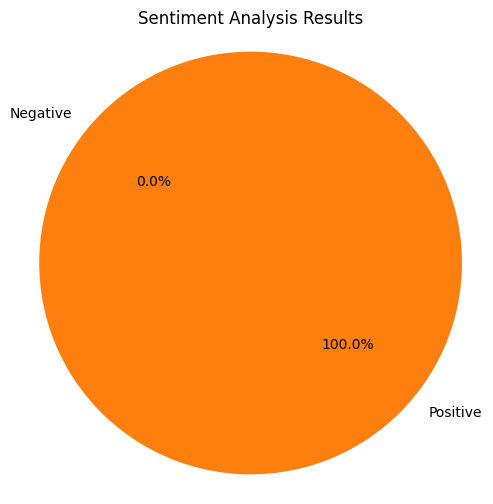

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis Results')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
y_pred = mn.predict(X_vec)

In [ ]:
labels = ['Negative', 'Positive']
count_negative = (y_pred == 'negative').sum()
count_positive = (y_pred == 'positive').sum()
sentiment_counts = [count_negative, count_positive]


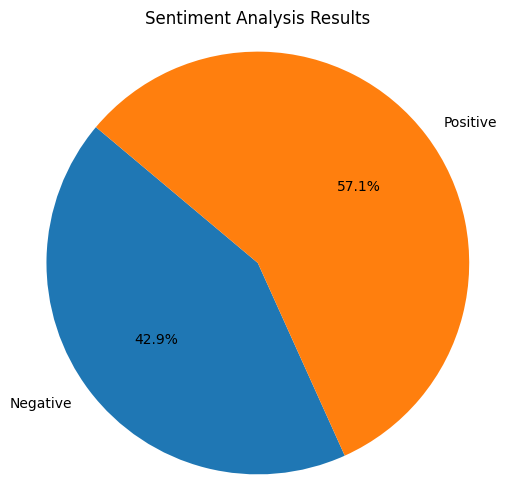

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis Results')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
mn.fit(X_vec, y_train)

MultinomialNB()

In [ ]:
y_pred = mn.predict(Xt_vect)

In [ ]:
labels = ['Negative', 'Positive']
count_negative = (y_pred == 'negative').sum()
count_positive = (y_pred == 'positive').sum()
sentiment_counts = [count_negative, count_positive]

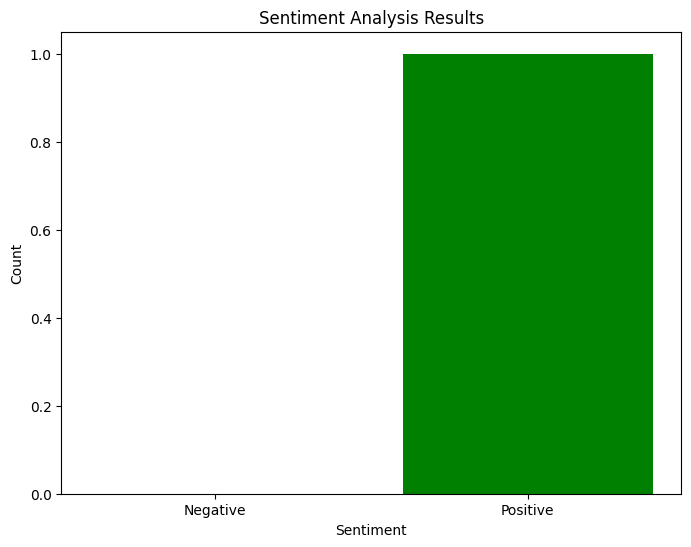

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(labels, sentiment_counts, color=['red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.show()

In [ ]:
y_pred = mn.predict(X_vec)

In [ ]:
labels = ['Negative', 'Positive']
count_negative = (y_pred == 'negative').sum()
count_positive = (y_pred == 'positive').sum()
sentiment_counts = [count_negative, count_positive]

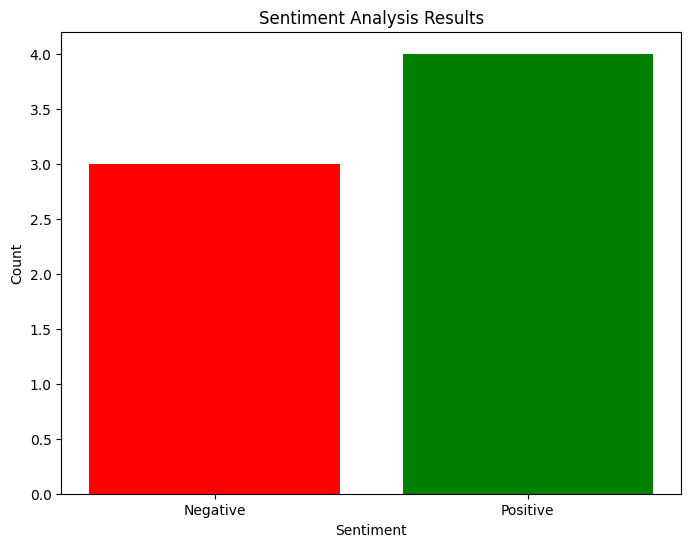

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(labels, sentiment_counts, color=['red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.show()